In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D,Activation,BatchNormalization,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/Product Review/Product Review Sentiment Analysis.xlsx')
df.head()

,Reviews,Sentiments
0,লটির পো ) ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা...,Negative
1,এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে ...,Negative
2,অডার করছিলাম ৪ বা ৫ তারিখ হতে বাড়া পারে তার প...,Negative
3,হারামজাদা | বক্স ভিজা ছিল বাড়া `,Negative
4,বোতলের মুখ ভাংগা ছিল পুরাই ফালতু _ হারামজাদা -,Negative


In [ ]:
df['Sentiments'].value_counts()

Positive     1964
Negative     1608
Name: Sentiments, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
import re
def remove_tags(raw_text):
  cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
  return cleaned_text

df['Reviews'] = df['Reviews'].apply(remove_tags)
df.head()

,Reviews,Sentiments
0,লটির পো ) ভালোই প্রথম দিনেই বেশ বড় সাইজের একটা...,Negative
1,এদের কাছ থেকে প্রডাক্ট নেওয়ার থেকে বাড়া নিজে ...,Negative
2,অডার করছিলাম ৪ বা ৫ তারিখ হতে বাড়া পারে তার প...,Negative
3,হারামজাদা | বক্স ভিজা ছিল বাড়া `,Negative
4,বোতলের মুখ ভাংগা ছিল পুরাই ফালতু _ হারামজাদা -,Negative


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = stopwords.words('bengali')
df['Reviews'] = df['Reviews'].apply(lambda x: [item for item in x.split() if item not in stop_words]).apply(lambda x:" ".join(x))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Reviews,Sentiments
0,লটির পো ) ভালোই দিনেই বড় সাইজের একটা ধরলাম বাড়া /,Negative
1,"প্রডাক্ট নেওয়ার বাড়া কেনা ভালো = শালার পো শালা ,",Negative
2,অডার করছিলাম ৪ ৫ তারিখ বাড়া ক্যনছেল অডার করলাম...,Negative
3,হারামজাদা | বক্স ভিজা বাড়া `,Negative
4,বোতলের মুখ ভাংগা পুরাই ফালতু _ হারামজাদা -,Negative


In [ ]:
import string,time
string.punctuation

exclude = string.punctuation

def remove_punc(text):
  return text.translate(str.maketrans('','', exclude))

df['Reviews'] = df['Reviews'].apply(remove_punc)
df.head()

,Reviews,Sentiments
0,লটির পো ভালোই দিনেই বড় সাইজের একটা ধরলাম বাড়া,Negative
1,প্রডাক্ট নেওয়ার বাড়া কেনা ভালো শালার পো শালা,Negative
2,অডার করছিলাম ৪ ৫ তারিখ বাড়া ক্যনছেল অডার করলাম...,Negative
3,হারামজাদা বক্স ভিজা বাড়া,Negative
4,বোতলের মুখ ভাংগা পুরাই ফালতু হারামজাদা,Negative


In [ ]:
# Function to remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Reviews'] = df['Reviews'].apply(remove_emoji)
df.head()

,Reviews,Sentiments
0,লটির পো ভালোই দিনেই বড় সাইজের একটা ধরলাম বাড়া,Negative
1,প্রডাক্ট নেওয়ার বাড়া কেনা ভালো শালার পো শালা,Negative
2,অডার করছিলাম ৪ ৫ তারিখ বাড়া ক্যনছেল অডার করলাম...,Negative
3,হারামজাদা বক্স ভিজা বাড়া,Negative
4,বোতলের মুখ ভাংগা পুরাই ফালতু হারামজাদা,Negative


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


textss = df['Reviews'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(textss)
vocab_size = len(tokenizer.word_index)
sequence_lengths = []
for text in textss:
    tokens = text.split()
    sequence_lengths.append(len(tokens))

max_sequence_length = max(sequence_lengths)

print(f'Vocabulary size: {vocab_size}')
print(f'Maximum sequence length: {max_sequence_length}')

Vocabulary size: 1858
Maximum sequence length: 41


In [ ]:
texts = df.drop('Sentiments', axis=1)
labels = df['Sentiments']
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(texts, labels)
print('Before sampling: ', Counter(labels))
print('After sampling: ', Counter(y_resampled))

Before sampling:  Counter({'Positive': 1964, 'Negative ': 1608})
After sampling:  Counter({'Negative ': 1964, 'Positive': 1964})


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_resampled['Reviews'])
sequences = tokenizer.texts_to_sequences(X_resampled['Reviews'])
vocab_size = len(tokenizer.word_index) + 1

X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
y = LabelEncoder().fit_transform(y_resampled)

In [ ]:
X[0]

array([ 34,   9,  90, 330, 187, 448,  11, 829, 177,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

num_epochs = 10
batch_size = 32
embedding_dim = 128

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='valid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = cnn_model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)


Epoch 1/10
99/99 [==============================] - 14s 118ms/step - loss: 1.0901 - accuracy: 0.8759 - val_loss: 0.3917 - val_accuracy: 0.9949
Epoch 2/10
99/99 [==============================] - 3s 29ms/step - loss: 0.2729 - accuracy: 0.9968 - val_loss: 0.1929 - val_accuracy: 0.9949
Epoch 3/10
99/99 [==============================] - 2s 21ms/step - loss: 0.1713 - accuracy: 0.9994 - val_loss: 0.1453 - val_accuracy: 1.0000
Epoch 4/10
99/99 [==============================] - 3s 32ms/step - loss: 0.1428 - accuracy: 0.9994 - val_loss: 0.1304 - val_accuracy: 1.0000
Epoch 5/10
99/99 [==============================] - 2s 23ms/step - loss: 0.1294 - accuracy: 0.9994 - val_loss: 0.1206 - val_accuracy: 1.0000
Epoch 6/10
99/99 [==============================] - 2s 17ms/step - loss: 0.1237 - accuracy: 0.9987 - val_loss: 0.1144 - val_accuracy: 1.0000
Epoch 7/10
99/99 [==============================] - 1s 14ms/step - loss: 0.1151 - accuracy: 0.9997 - val_loss: 0.1073 - val_accuracy: 1.0000
Epoch 8/10


25/25 [==============================] - 0s 6ms/step - loss: 0.0934 - accuracy: 1.0000
Loss of CNN Model :  0.09335987269878387
Accuracy of CNN Model :  1.0





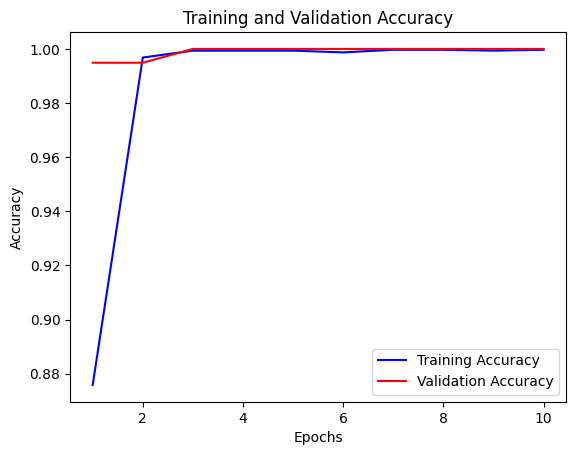

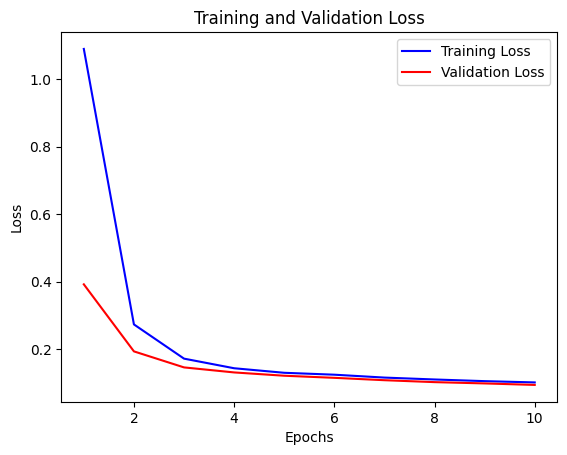



25/25 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       422
    Positive       1.00      1.00      1.00       364

    accuracy                           1.00       786
   macro avg       1.00      1.00      1.00       786
weighted avg       1.00      1.00      1.00       786



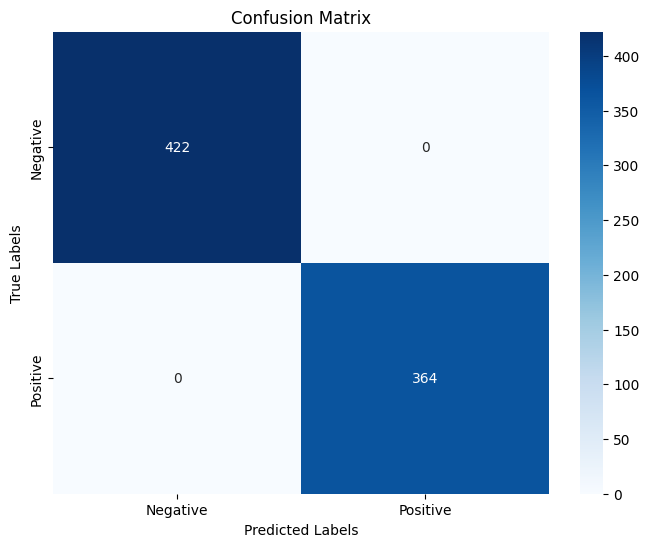

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test,y_test)
print('Loss of CNN Model : ',loss)
print('Accuracy of CNN Model : ',accuracy)
print('\n\n')
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_accuracy) + 1)


plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('\n')
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test data
y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")
# Generate a classification report
class_names = ["Negative", "Positive"]
print(classification_report(y_test, y_pred, target_names=class_names))
# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()